### PyFVCOM plotting tools

Here, we demonstrate plotting of the surface elevation across the model domain at a given time.

We load some model output into an object which can be passed to a number of plotting objects. These objects have methods for plotting different aspects of the data.

In [89]:
#%matplotlib inline

In [90]:
# Load an FVCOM model output and plot a surface.
from PyFVCOM.read import FileReader
from PyFVCOM.plot import Plotter
#from PyFVCOM.tide import make_water_column
#from cmocean import cm
#import matplotlib
#GTK3Agg, GTK3Cairo, GTK4Agg, GTK4Cairo, MacOSX, nbAgg, QtAgg, QtCairo, TkAgg, TkCairo, WebAgg, WX, WXAgg, WXCairo, Qt5Agg, Qt5Cairo
#['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']
#matplotlib.use('QTAgg')
import matplotlib.pyplot as plt
import mpl_toolkits
from IPython import display
import os
import time


## Time snaps to plot. 
We set this to load only those snaps, and not all time records from the FVCOM output file. 
If we set snaps = False, all the time records will be loaded.

We can set the variable to_file = True to save the plots directly to some defined location. 

In [91]:
# Set time snaps to plot
snaps = True
snap1 = 100
snap2 = 120

# Set the option to display the plots (to_file = False) or to save to a file (to_file = True)
to_file = False
path_to_plots = r"W:\users\odiaz\models\FVCOM\intel_2022.0.2\fvcom27\run_PB\OUTPUT_PB10.1_test\netcdf\plot_zeta"

if to_file:
    if not os.path.exists(path_to_plots):
        try:
            os.makedirs(path_to_plots)
        except:
            print("Can't create folder: "+path_to_plots)
            to_file = False


In [95]:
# Create an object which holds the model outputs. We're only loading
# bathimetry to plot it. 
mydir = r"W:\users\odiaz\models\FVCOM\intel_2022.0.2\fvcom27\run_PB\OUTPUT_PB10.1_test\netcdf"
myfile = 'pb10.1_0001.nc'
#mydir = r"W:\users\odiaz\models\FVCOM\intel_2022.0.2\fvcom27\run_MissRiverWedge\OUTDIR_mrp07#PBS\netcdf"
#myfile = 'mrp07#PBS_0001.nc'
if snaps:
    fvcom = FileReader( os.path.join(mydir, myfile), dims={'time': range(snap1, snap2)}, variables=['time','zeta'])
else:
    fvcom = FileReader( os.path.join(mydir, myfile), variables=['time','zeta'])

fvcom_plot_zeta_20000106000000.png


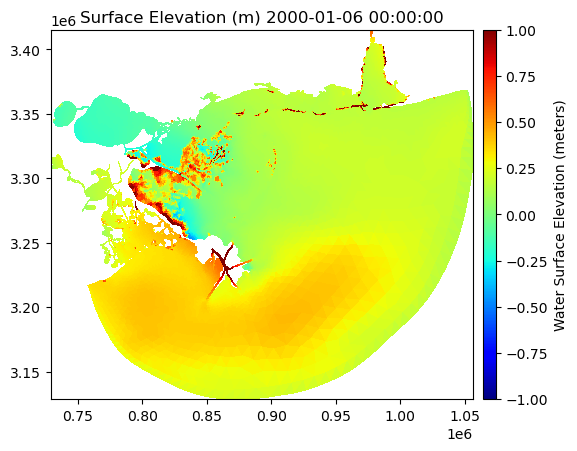

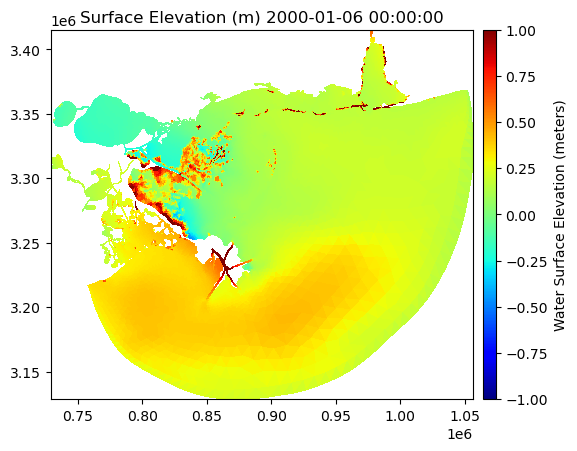

In [96]:
# Make a plot of the topo/bathymetry.
plt.ion()
fig1 = plt.figure(1)
plot = Plotter(fvcom, figure=fig1,
#plot = Plotter(fvcom, 
               figsize=(20, 20),  
               cartesian=True,             
               vmin=-1.0, vmax=1.0,
               cb_label='{} ({})'.format(fvcom.atts.zeta.long_name,
                                         fvcom.atts.zeta.units),
               cmap='jet')

for i in range(len(fvcom.data.time[:])):
    display.clear_output(wait=True)
    plot.plot_field(fvcom.data.zeta[i, :], cmap='jet')
    date_stamp = fvcom.time.datetime[i].strftime('%Y%m%d%H%M%S')
    date_stamp_title = fvcom.time.datetime[i].strftime('%Y-%m-%d %H:%M:%S')
    plot.axes.set_title('Surface Elevation (m) '+date_stamp_title)

    figname = "fvcom_plot_zeta_"+date_stamp+".png"
    print(figname)

    if to_file:
        plot.figure.savefig(os.path.join(path_to_plots, figname), bbox_inches='tight')
    else:
        display.display(plt.gcf())        
        
        time.sleep(0.1)  
        #plt.pause(.1)     